In [24]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

from scipy import interp
import math
from scipy.stats import norm
from scipy import stats

In [25]:
train = pd.read_csv("../dataset/train.csv")
train = train.drop('PassengerId', axis=1)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [27]:
test = pd.read_csv("../dataset/test.csv")
test = test.drop('PassengerId', axis=1)
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [28]:
merged = pd.concat([train, test], sort=False).reset_index(drop=True)
merged

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


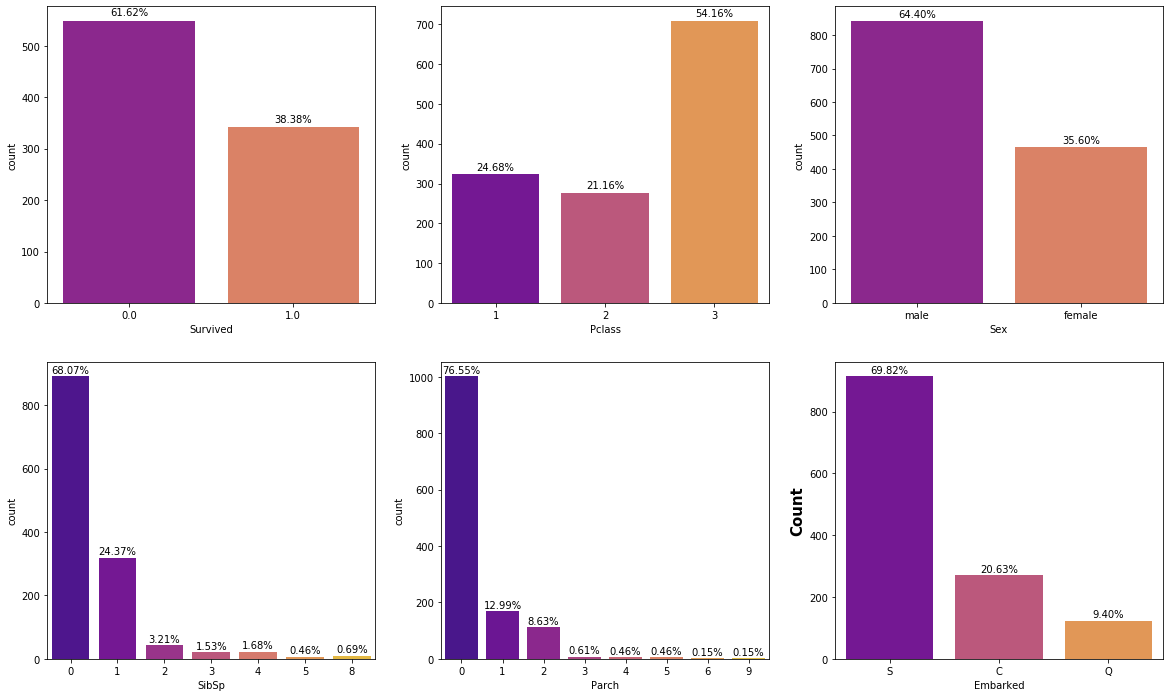

In [50]:
cats = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
def plotFrequency(cats):
    #"A plot for visualize categorical data, showing both absolute and relative frequencies"
    fig, axes = plt.subplots(math.ceil(len(cats) / 3), 3, figsize=(20, 12))
    axes = axes.flatten()

    for ax, cat in zip(axes, cats):
        if cat == 'Survived':
            total = float(len(train[cat]))
        else:
            total = float(len(merged[cat]))
        sns.countplot(merged[cat], palette='plasma', ax=ax)

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 10,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha="center")

        plt.ylabel('Count', fontsize=15, weight='bold')
plotFrequency(cats)

In [33]:
def plotsurvival(cats, data):
    fig, axes = plt.subplots(math.ceil(len(cats) / 3), 3, figsize=(20, 12))
    axes = axes.flatten()

    for ax, cat in zip(axes, cats):
        if cat == 'Survived':
            sns.countplot(train[cat], palette='plasma', ax=ax)

        else:

            sns.countplot(x=cat,
                          data=data,
                          hue='Survived',
                          palette='plasma',
                          ax=ax)
            ax.legend(title='Survived?',
                      loc='upper right',
                      labels=['No', 'Yes'])

        plt.ylabel('Count', fontsize=15, weight='bold')

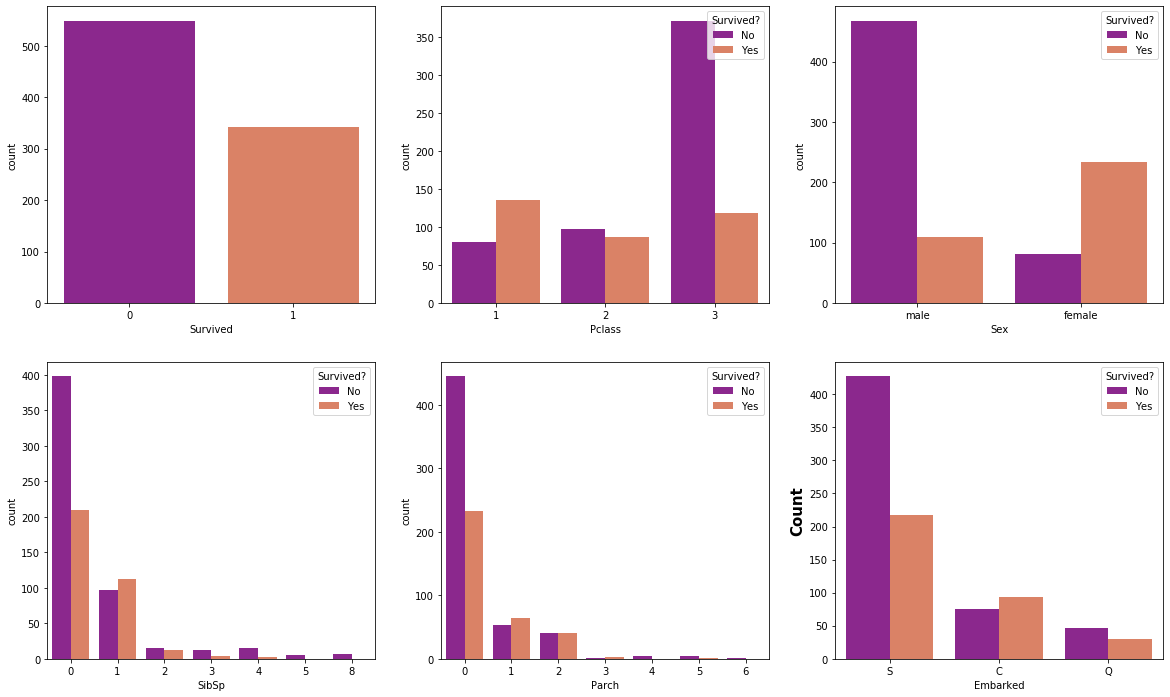

In [34]:
plotsurvival(cats, train)

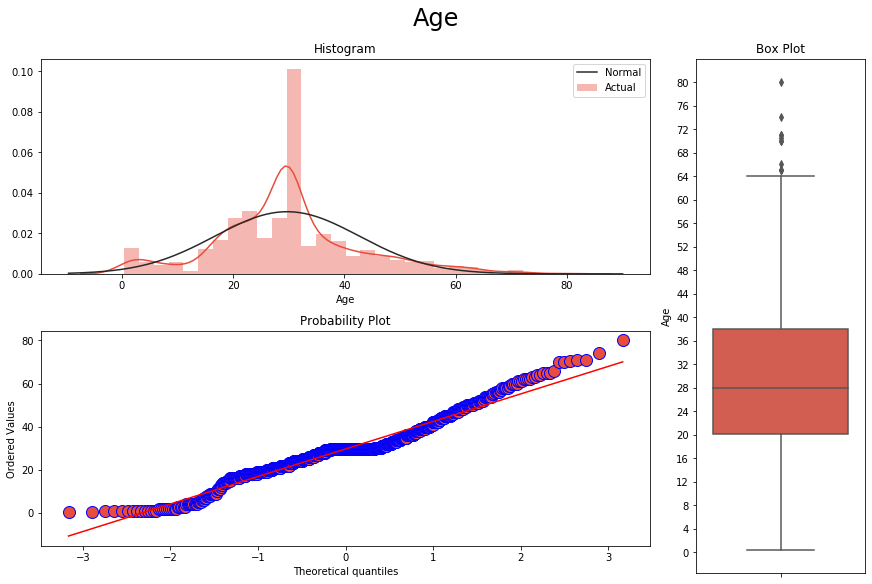

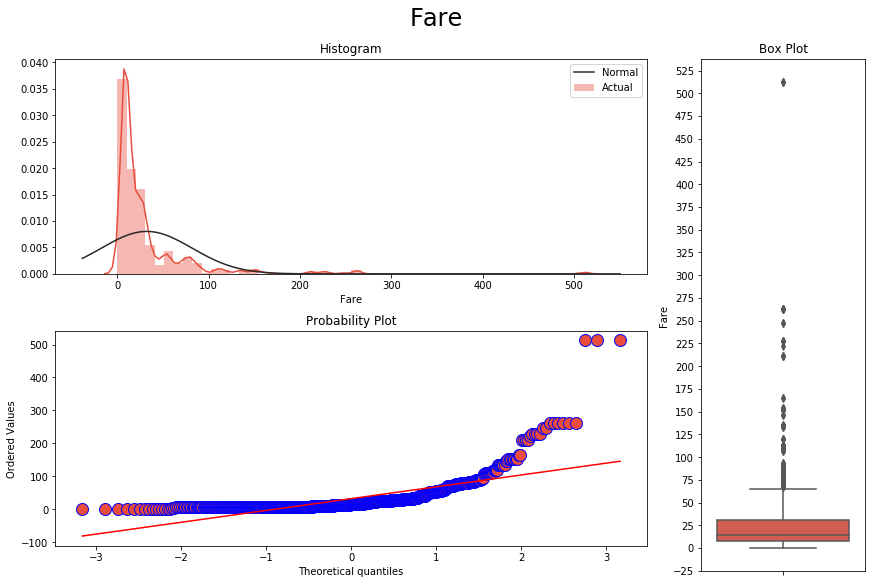

In [76]:
def plot_3chart(df, feature):
    import matplotlib.gridspec as gridspec
    from matplotlib.ticker import MaxNLocator
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature].fillna(np.mean(df.loc[:, feature])),
                 hist=True,
                 kde=True,
                 fit=norm,
                 ax=ax1,
                 color='#e74c3c')
    ax1.legend(labels=['Normal', 'Actual'])

    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('Probability Plot')
    stats.probplot(df.loc[:, feature].fillna(np.mean(df.loc[:, feature])),
                   plot=ax2)
    ax2.get_lines()[0].set_markerfacecolor('#e74c3c')
    ax2.get_lines()[0].set_markersize(12.0)

    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:, feature], orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=24))

    plt.suptitle(f'{feature}', fontsize=24)
plot_3chart(train, 'Age')
plot_3chart(train, 'Fare')

In [78]:
train_corr = train[['Survived', 'Age', 'Fare']].corr(method='spearman').abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
train_corr.rename(columns={
    'level_0': 'Feature A',
    'level_1': 'Feature B',
    0: 'Correlation Coefficient'
},
                  inplace=True)
train_corr[(train_corr['Feature A'] == 'Survived')].style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
2,Survived,Survived,1
4,Survived,Fare,0.323736
8,Survived,Age,0.0525653


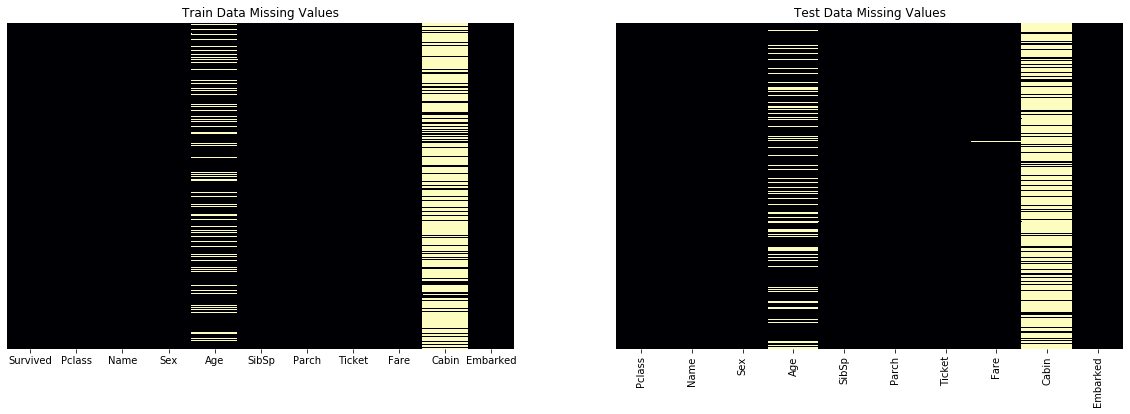

In [81]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.heatmap(train.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax[0])
sns.heatmap(test.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax[1])

ax[0].set_title('Train Data Missing Values')
ax[1].set_title('Test Data Missing Values')

plt.xticks(rotation=90)
plt.show()

In [142]:
def status(feature):
    print('Processing', feature, ': DONE')
    print(f'Shape after processing {combined.shape}')
    print('*' * 40)

In [143]:
def get_combined_data():
    # Reading train data
    train = pd.read_csv("../dataset/train.csv")
#     train = train.drop('PassengerId', axis=1)

    # Reading test data
    test = pd.read_csv('../dataset/test.csv')

    # extracting the targets from the training data
    targets = train.Survived

    # Merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True, drop=True)

    return combined

In [144]:
def process_family():

    global combined
    # Introducing a new feature : The size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1

    # Introducing another feature based on the family size
    combined['Alone'] = combined['FamilySize'].map(lambda s: 1
                                                   if s == 1 else 0)

    # These two below are optional, it didn't help with the model...
    #combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    #combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)

    status('Family')
    return combined


In [145]:
def family_survival():
    global combined

    # A function working on family survival rate using last names and ticket features

    # Extracting surnames
    combined['Last_Name'] = combined['Name'].apply(
        lambda x: str.split(x, ",")[0])

    # Adding new feature: 'Survived'
    default_survival_rate = 0.5
    combined['Family_Survival'] = default_survival_rate

    for grp, grp_df in combined[[
            'Survived', 'Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
            'SibSp', 'Parch', 'Age', 'Cabin'
    ]].groupby(['Last_Name', 'Fare']):

        if (len(grp_df) != 1):
            # A Family group is found.
            for ind, row in grp_df.iterrows():
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    combined.loc[combined['PassengerId'] ==
                                 passID, 'Family_Survival'] = 1
                elif (smin == 0.0):
                    combined.loc[combined['PassengerId'] ==
                                 passID, 'Family_Survival'] = 0

    for _, grp_df in combined.groupby('Ticket'):
        if (len(grp_df) != 1):
            for ind, row in grp_df.iterrows():
                if (row['Family_Survival'] == 0) | (
                        row['Family_Survival'] == 0.5):
                    smax = grp_df.drop(ind)['Survived'].max()
                    smin = grp_df.drop(ind)['Survived'].min()
                    passID = row['PassengerId']
                    if (smax == 1.0):
                        combined.loc[combined['PassengerId'] ==
                                     passID, 'Family_Survival'] = 1
                    elif (smin == 0.0):
                        combined.loc[combined['PassengerId'] ==
                                     passID, 'Family_Survival'] = 0

    status('FamilySurvival')
    return combined

In [146]:
def get_titles():

    title_dictionary = {
        'Capt': 'Dr/Clergy/Mil',
        'Col': 'Dr/Clergy/Mil',
        'Major': 'Dr/Clergy/Mil',
        'Jonkheer': 'Honorific',
        'Don': 'Honorific',
        'Dona': 'Honorific',
        'Sir': 'Honorific',
        'Dr': 'Dr/Clergy/Mil',
        'Rev': 'Dr/Clergy/Mil',
        'the Countess': 'Honorific',
        'Mme': 'Mrs',
        'Mlle': 'Miss',
        'Ms': 'Mrs',
        'Mr': 'Mr',
        'Mrs': 'Mrs',
        'Miss': 'Miss',
        'Master': 'Master',
        'Lady': 'Honorific'
    }

    # Extract the title from names
    combined['Title'] = combined['Name'].map(
        lambda name: name.split(',')[1].split('.')[0].strip())

    # Mapping titles
    combined['Title'] = combined.Title.map(title_dictionary)
    status('Title')
    return combined

In [147]:
def process_names():
    global combined
    # Cleaning the Name variable
    combined.drop('Name', axis=1, inplace=True)

    # Encoding names as dummy variables
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)

    # Removing the title variable after getting dummies
    combined.drop('Title', axis=1, inplace=True)

    status('names')
    return combined

In [148]:
def process_age():
    global combined
    # A function that fills the missing values of the Age variable
    combined['Age'] = combined.groupby(
        ['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))
    status('Age')
    return combined

In [149]:
def age_binner():
    global combined
    # Ranging and grouping Ages
    #bins = [0, 2, 18, 35, 65, np.inf]
    names = ['less2', '2-18', '18-35', '35-65', '65plus']

    #combined['AgeBin'] = pd.cut(combined['Age'], bins, labels=names)
    combined['AgeBin'] = pd.qcut(combined['Age'],q = 5, labels = names)
    age_dummies = pd.get_dummies(combined['AgeBin'], prefix='AgeBin')
    combined = pd.concat([combined, age_dummies], axis=1)
    combined.drop('AgeBin', inplace=True, axis=1)
    combined.drop('Age', inplace=True, axis=1)
    status('Age Bins')
    return combined

In [150]:
def process_fares():
    global combined

    # Filling missing values in fare

    combined['Fare'] = combined.groupby(
        ['Pclass', 'Sex'])['Fare'].apply(lambda x: x.fillna(x.median()))
    status('fare')
    return combined

In [151]:
def process_fare_bin(onehot='None'):

    global combined
    # Ranging and grouping Fare using historical data
    bins = [-1, 7.91, 14.454, 31, 99, 250, np.inf]
    names = [0, 1, 2, 3, 4, 5]

    combined['FareBin'] = pd.cut(combined['Fare'], bins,
                                 labels=names).astype('int')
    if onehot == 'yes':
        farebin_dummies = pd.get_dummies(combined['FareBin'], prefix='FareBin')
        combined = pd.concat([combined, farebin_dummies], axis=1)
        combined.drop('FareBin', inplace=True, axis=1)
        combined.drop('Fare', inplace=True, axis=1)
    elif onehot == 'both':
        farebin_dummies = pd.get_dummies(combined['FareBin'], prefix='FareBin')
        combined = pd.concat([combined, farebin_dummies], axis=1)
        combined.drop('FareBin', inplace=True, axis=1)
    else:
        combined.drop('Fare', inplace=True, axis=1)

    status('FareBin')
    return combined

In [152]:
def scale_fare():

    # A definition for scaling fare values

    from scipy.stats import skew, boxcox_normmax, norm
    from scipy.special import boxcox1p
    global combined
    combined['Fare'] = boxcox1p(combined['Fare'],
                                boxcox_normmax(combined['Fare'] + 1))
    status('NFareBin')
    return combined

In [153]:
def process_embarked():
    global combined
    # Filling missing embarked values with the most frequent one
    combined.Embarked.fillna(combined.Embarked.mode()[0], inplace=True)
    # One hot encoding
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('Embarked')
    return combined

In [154]:
def process_cabin():
    global combined
    # Replacing missing cabins with M (for Missing)
    combined['Cabin_Informed'] = [
        1 if pd.notnull(cab) else 0 for cab in combined['Cabin']
    ]
    combined.Cabin.fillna('M', inplace=True)

    # Mapping each Cabin value with the cabin letter
    combined['Deck'] = combined['Cabin'].map(lambda c: c[0])

    combined['Deck'].replace('T', 'A', inplace=True)

    # One hot encoding ...
    cabin_dummies = pd.get_dummies(combined['Deck'], prefix='Deck')
    combined = pd.concat([combined, cabin_dummies], axis=1)

    combined.drop('Cabin', axis=1, inplace=True)
    combined.drop('Deck', axis=1, inplace=True)
    status('Cabin')
    return combined

In [155]:
def process_sex():
    global combined
    # Mapping string values with numerical ones
    combined['Sex'] = combined['Sex'].map({'male': 1, 'female': 0})
    status('Sex')
    return combined

In [156]:
def process_pclass():

    global combined
    # One hot encoding pclass into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix='Pclass')

    # Adding dummy variables to main set
    combined = pd.concat([combined, pclass_dummies], axis=1)

    # Removing redundant 'Pclass'
    combined.drop('Pclass', axis=1, inplace=True)

    status('Pclass')
    return combined

In [157]:
def process_ticket():

    global combined

    # A function that extracts each prefix of the ticket, returns 'Unknown' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.', '')
        ticket = ticket.replace('/', '')
        ticket = ticket.split()
        ticket = map(lambda t: t.strip(), ticket)
        ticket = list(filter(lambda t: not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else:
            return 'Unknown'

    # Extracting dummy variables from tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    status('Ticket')
    return combined

In [158]:
def dropper():
    global combined

    combined.drop('Cabin', axis=1, inplace=True)
    combined.drop('PassengerId', inplace=True, axis=1)
    combined.drop('Last_Name', inplace=True, axis=1)
    combined.drop('Survived', inplace=True, axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    return combined

In [159]:
# Executing definitions to process data
combined = get_combined_data()  # For merging train test data
combined = family_survival()  # For creating family survival feature
combined = process_family()  # For creating Family size feature
combined = get_titles()  # For extracting titles
combined = process_names()  # For one hot encoding titles
combined = process_age()  # For imputing missing age values
combined = age_binner()  # For grouping and hot encoding age ranges
combined = process_fares()  # For imputing fares
# For grouping and label encoding fares, can use 'both' for keeping age with dummies or yes for just one hot
combined = process_fare_bin(onehot='no')
# combined =scale_fare() # For scaling age values
combined = process_embarked()  # For imputing embarked and one hot encoding
# combined = process_cabin() # For extracting deck info from cabins
combined = process_sex()  # For label encoding sex
# combined = process_pclass() # For one hot encoding pclass
# combined = process_ticket() # For extracting ticket info
combined = dropper()  # For dropping not needed features
print(
    f'Processed everything. Missing values left: {combined.isna().sum().sum()}'
)

Processing FamilySurvival : DONE
Shape after processing (1309, 14)
****************************************
Processing Family : DONE
Shape after processing (1309, 16)
****************************************
Processing Title : DONE
Shape after processing (1309, 17)
****************************************
Processing names : DONE
Shape after processing (1309, 21)
****************************************
Processing Age : DONE
Shape after processing (1309, 21)
****************************************
Processing Age Bins : DONE
Shape after processing (1309, 25)
****************************************
Processing fare : DONE
Shape after processing (1309, 25)
****************************************
Processing FareBin : DONE
Shape after processing (1309, 25)
****************************************
Processing Embarked : DONE
Shape after processing (1309, 27)
****************************************
Processing Sex : DONE
Shape after processing (1309, 27)
**************************************

In [164]:
merged = combined.copy()
merged['Survived'] = train['Survived']
merged.head()

,Parch,Pclass,Sex,SibSp,Family_Survival,FamilySize,Alone,Title_Dr/Clergy/Mil,Title_Honorific,Title_Master,...,AgeBin_less2,AgeBin_2-18,AgeBin_18-35,AgeBin_35-65,AgeBin_65plus,FareBin,Embarked_C,Embarked_Q,Embarked_S,Survived
0,0,3,1,1,0.5,2,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0.0
1,0,1,0,1,0.5,2,0,0,0,0,...,0,0,0,1,0,3,1,0,0,1.0
2,0,3,0,0,0.5,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,1.0
3,0,1,0,1,0.0,2,0,0,0,0,...,0,0,0,1,0,3,0,0,1,1.0
4,0,3,1,0,0.5,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0.0


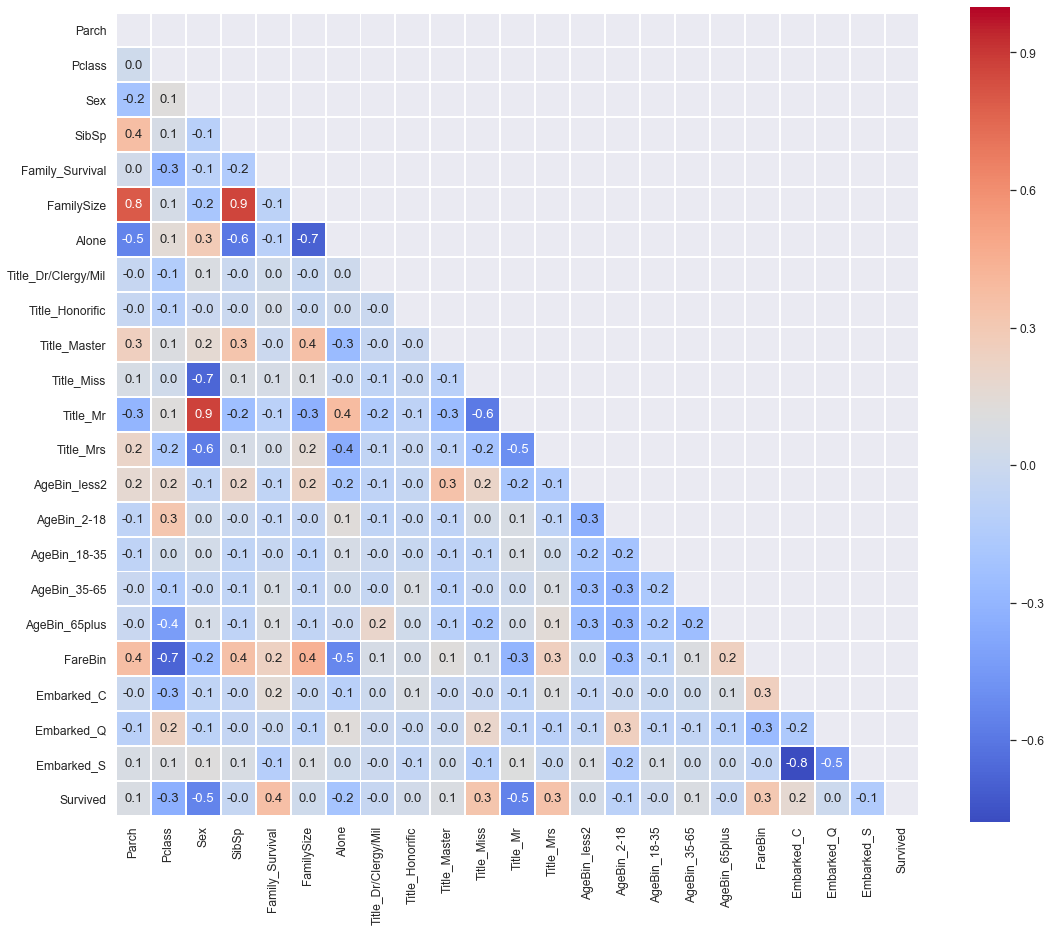

In [165]:
# Display numerical correlations between features on heatmap
sns.set(font_scale=1.1)
correlation_train = merged.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1)

plt.show()